# Predicting Insurance Costs With Linear Regression

## 1. Introduction

This project aims to forecast insurance costs by using Linear Regression on the [Medical Cost Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) from Kaggle, which contains information on individual medical insurance bills, where each bill is associated with some demographic and personal characteristics of its recipient.

Of interest is how the different characteristics relate to the **total medical cost**, which is a continuous, positive number. The goal is to construct the best possible predictive model for the cost, given some information about the patient. Predicting medical costs is an important task as it allows hospitals to predict revenue and plan necessary procedures needed by its patient population.

In [1]:
# Include data dictionary?

In [2]:
# Load the relevant libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
# Read the data into a dataframe
insurance = pd.read_csv('insurance.csv')

# Let's take a look at the first 5 rows of the dataframe
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploring the Dataset

In [4]:
# Check the number of features and observations in the dataset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 7 columns and 1338 rows in the dataset.

In [5]:
# Count how many columns are of each of the data types
insurance.dtypes.value_counts()

object     3
float64    2
int64      2
dtype: int64

There are 3 columns of the string type (sex, smoker, region); two columns containing integers (age, children); and two columns with floats (bmi and charges).

In [6]:
# Double check for missing values
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in any of the columns.

### EDA: Descriptive Statistics

In [7]:
# Display the descriptive statistics for the dataframe
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Display the descriptive statistics for the categorical columns in the dataframe
insurance.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### EDA: Visualisations

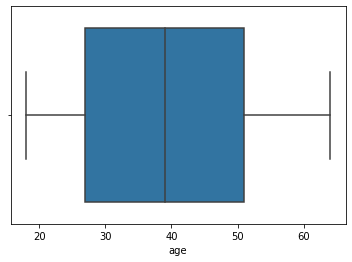

<Figure size 432x288 with 0 Axes>

In [9]:
ax = sns.boxplot(x="age", data=insurance)
plt.show()
plt.clf()

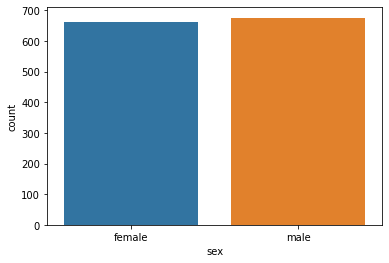

<Figure size 432x288 with 0 Axes>

In [10]:
ax = sns.countplot(x="sex", data=insurance)
plt.show()
plt.clf()

We have roughly the same number of females and males. 

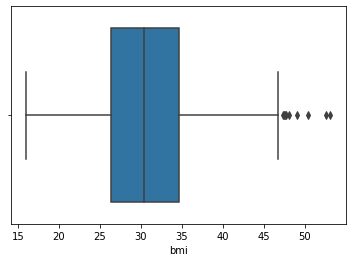

<Figure size 432x288 with 0 Axes>

In [11]:
ax = sns.boxplot(x='bmi', data=insurance)
plt.show()
plt.clf()

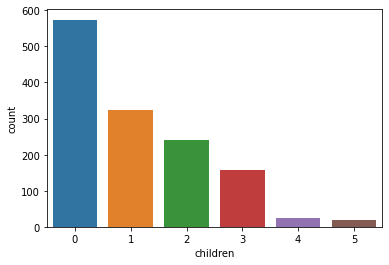

<Figure size 432x288 with 0 Axes>

In [12]:
ax = sns.countplot(x="children", data=insurance)
plt.show()
plt.clf()

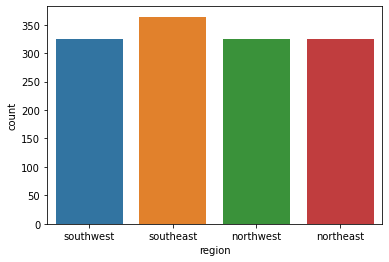

<Figure size 432x288 with 0 Axes>

In [13]:
ax = sns.countplot(x="region", data=insurance)
plt.show()
plt.clf()

We have roughly an equal amount of people in each region.

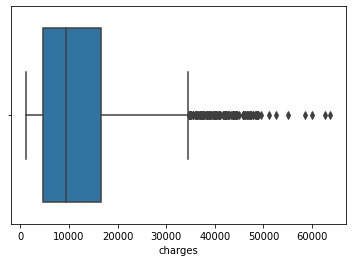

<Figure size 432x288 with 0 Axes>

In [14]:
ax = sns.boxplot(x='charges', data=insurance)
plt.show()
plt.clf()

Let's create a Pearson's correlation heat map to explore how the columns correlate to one another.

<AxesSubplot:>

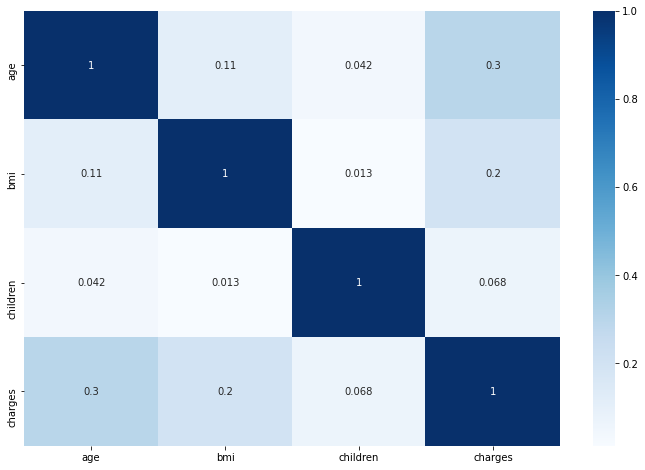

In [15]:
correlations = insurance.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap='Blues')

Let's look at the categorical columns. First, let's convert them to numerical columns.

In [16]:
# Make a copy of the dataframe
insurance_mod = insurance.copy()

In [17]:
# Get the value counts for the 'sex' column for checking purposes later on
insurance_mod['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
# Replace the values in the 'sex' column with 1 for 'male' and 0 for 'female'
insurance_mod['sex'] = insurance_mod['sex'].apply(lambda x:1 if x == 'male' else 0)

In [19]:
# Get the value counts for the 'sex' column to check the conversion from categorical to numerical
insurance_mod['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [20]:
# Get the value counts for the 'smoker' column for checking purposes later on
insurance_mod['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
# Replace the values in the 'smoker' column with 1 for 'yes' and 0 for 'no'
insurance_mod['smoker'] = insurance_mod['smoker'].apply(lambda x:1 if x == 'yes' else 0)

In [22]:
# Get the value counts for the 'smoker' column to check the conversion from categorical to numerical
insurance_mod['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [23]:
# Get the value counts for the 'region' column for checking purposes later on
insurance_mod['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [24]:
# One-hot encode the 'region' column
insurance_mod = pd.get_dummies(data=insurance_mod, columns=['region'])

insurance_mod.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


The conversions have worked.

Again, let's create a Pearson's correlation heat map to explore how the columns correlate to one another.

<AxesSubplot:>

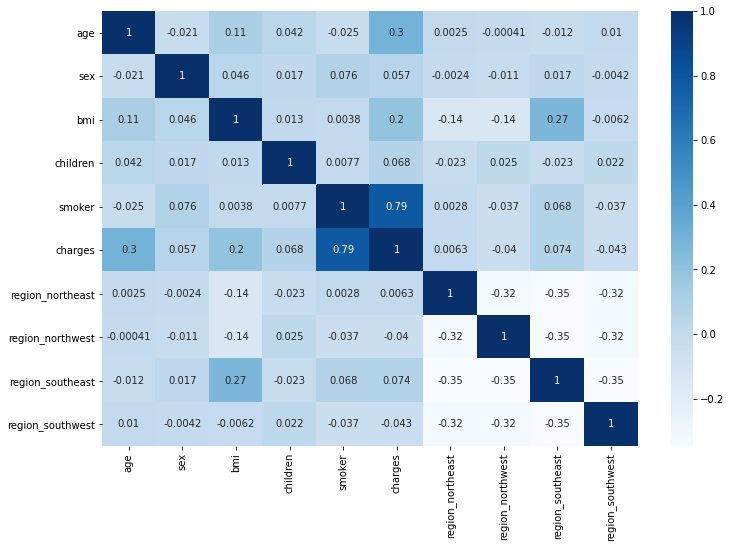

In [25]:
correlations = insurance_mod.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap='Blues')

The following columns are correlated with each other (above or below arbitrary cutoff points of +/- 0.3):
* `age` and `charges`
* `smoker` and `charges`

### Feature Selection

The EDA has given us a general understanding of the features, and has helped to identify the following features to begin with:
* age
* smoker

It makes intuitive sense that the higher the age, the more numerous and serious health problems there might be, which would push up medical costs. Similar reasoning holds for people who are smokers.

## 3. Dividing the Data

We need to divide the `insurance_mod` dataset into two portions:
1. A training set that will be used to estimate the regression coefficients.
2. A test set that will be used to assess the predictive ability of the model.

In [26]:
# Divide up the data into a training set and a test set, with 20% dedicated to the test set
X = insurance_mod.drop('charges', axis=1)
y = insurance_mod['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=730)

## 4. Build the Model

### Simple Linear Regression

We're now ready to build our predictive model since the data has been divided up into a training set and a test set.

We'll start with one feature at a time. Normally, we would put the candidate features into a list and loop through it to create univarate models; but in this instance, we will create them one by one without using a loop so that we can more easily add annotations for the error metrics.


In [27]:
model = LinearRegression()

# Let's start with the 'age' column as the predictor for our linear regression model
X_train_subset = X_train[['age']]
model.fit(X_train_subset, y_train)

predictions = model.predict(X_train_subset)
residuals = y_train - predictions

training_mse = mean_squared_error(y_train, predictions)
training_rmse = mean_squared_error(y_train, predictions, squared=False)
print(f"training_mse: {training_mse}")
print(f"training_rmse: {training_rmse}")

training_mse: 134337341.5225584
training_rmse: 11590.398678326746


As seen above, the average of the `charges` column is \\$13,270, so a training_rmse of \\$11,590 is very high. This implies that we should expect the model to be off by \\$11,590 on average for the predicted insurance cost.

In [28]:
# Let's look at the intercept and coefficient of the model
intercept = model.intercept_
print(intercept)

coefficient = model.coef_
print(coefficient)

2611.82780912829
[270.35625287]


The intercept = \\$2611.83 is the mean of the outcome when the predictor (`age`) is 0.

In [29]:
# Let's calculate the coefficient of determination
R2 = r2_score(y_train, predictions)
print(f"The coefficient of determination, R2: {R2}")

The coefficient of determination, R2: 0.09599782444759941


If the linear regression predicts the outcome _perfectly_, then the coefficient of determination (R2) would be equal to 1. The higher this value is, the better the predictions that the model makes. The R2 value above is clearly a lot smaller than 1.

In [30]:
# Let's check the residual mean (it should be close to 0)
residual_mean = np.mean(residuals)
print(residual_mean)

1.6319904929009553e-12


The residual mean is a very small number, and could be considered as 0. This implies that the predictions are _unbiased_ (the number of times the predictions are above zero roughly equals the number of times they are below zero).

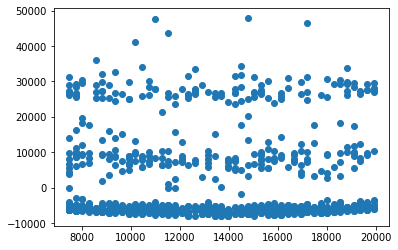

In [31]:
# Let's now check that variance of the errors is constant by creating a residuals plot
plt.scatter(predictions, residuals)
plt.show()

There is no one band of constant width around 0, hence it doesn't look like the constant variance assumption holds.

Let's now repeat the steps above and build a simple linear regression model with the `smoker` column.

In [32]:
model = LinearRegression()

# Let's use the 'smoker' column
X_train_subset = X_train[['smoker']]
model.fit(X_train_subset, y_train)

predictions = model.predict(X_train_subset)
residuals = y_train - predictions

training_mse = mean_squared_error(y_train, predictions)
training_rmse = mean_squared_error(y_train, predictions, squared=False)
print(f"training_mse: {training_mse}")
print(f"training_rmse: {training_rmse}")

training_mse: 56472396.63686987
training_rmse: 7514.811816464194


As noted above, the average of the `charges` column is \\$13,270, so a training_rmse of \\$7,514.81 is still very high but much better than when we only used the `age` column. A training_rmse of \\$7,514,81 implies that we should expect the model to be off by \\$7,514,81 on average for the predicted insurance cost.